#  Импорт данных


In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap



In [ ]:
plt.style.use('dark_background')

## Метод главных компонент


In [ ]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.values = None
        self.mean = None

    #--------------------------------
    def fit(self, X):

        self.mean = np.mean(X, axis=0)

        # Считаем матрицу ковариации
        cov_matrix = np.cov(X - self.mean, rowvar = False)

        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        idx = eigenvalues.argsort()[::-1] #Сортируем по возрастанию

        # Берём первые n главных компонент
        self.components = eigenvectors[:, idx][:, :self.n_components]
        self.values     = eigenvalues[idx]

        return self

    #--------------------------------
    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components)
    #--------------------------------
    def fit_transform(self, X):
        return self.fit(X).transform(X)
    #--------------------------------
    def inverse_transform(self, X_new):
        return np.dot(X_new, self.components.T) + self.mean
    #--------------------------------
    def score(self, X):
        SStot = np.sum(np.square(X - np.mean(X)))
        SSres = np.sum(np.square(X - self.inverse_transform(self.fit_transform(X))))
        return 1 - SSres/SStot
    #--------------------------------
    def plot_eigvalues(self, figsize=(15,7)):
        plt.figure(figsize=figsize)
        plt.plot(self.values,'.',
                 label='Все собственные значения',
                 linewidth = 3)
        plt.plot(self.values[:self.n_components],'r-o',
                 label='Собственное Пространство',
                 markersize = 10, mfc='none',
                 linewidth = 2, alpha = 0.8)
        plt.ylabel('собственные\n значения', fontsize=25)
        plt.grid();
        plt.legend(fontsize=25);
        plt.xticks(FontSize = 25); plt.yticks(FontSize = 25);
        plt.tight_layout();



# Синтетические данные

На этот раз зададим не 2-мерные данные, а 4-мерные

# Ситуация 1.

У нас есть 4 признака, каждый из которых имеет разную "значимость"  в контексте дисперсии исходных данных

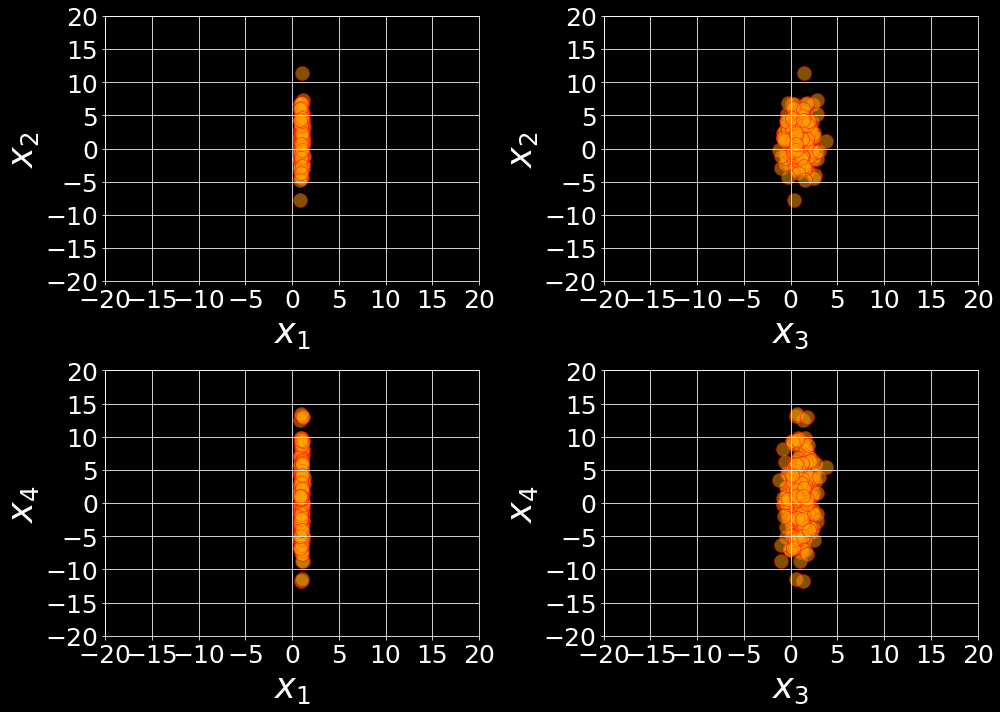

In [ ]:
#@title **Параметры распределения данных** { run: "auto" }
#@markdown ### Радиусы
S1 =  0.1 #@param {type:"slider", min:0, max:5, step:0.1}
S2 =  2.7 #@param {type:"slider", min:0, max:5, step:0.1}
S3 =  0.9 #@param {type:"slider", min:0, max:5, step:0.1}
S4 =  4.7 #@param {type:"slider", min:0, max:5, step:0.1}
#@markdown ### Количество точек
N = 200 #@param {type:"slider", min:100, max:2000, step:100}

np.random.seed(42)


Sigmas = np.array([S1, S2, S3, S4])



X = np.diag(Sigmas) @ np.random.randn(4, N)+np.ones((4, N))

fig = plt.figure(figsize=(14,10))

plt.subplot(221)
plt.grid()

plt.scatter(X[0,:],X[1,:],
            alpha = 0.5, s = 196,
            c = 'orange', edgecolor = 'r')
plt.xlabel(r'$x_1$',fontsize=35)
plt.ylabel(r'$x_2$',fontsize=35)
plt.xticks(FontSize = 25)
plt.yticks(FontSize = 25);
plt.xlim([-20,20])
plt.ylim([-20,20])

plt.subplot(222)
plt.grid()

plt.scatter(X[2,:],X[1,:],
            alpha = 0.5, s = 196,
            c = 'orange', edgecolor = 'r')
plt.xlabel(r'$x_3$',fontsize=35)
plt.ylabel(r'$x_2$',fontsize=35)
plt.xticks(FontSize = 25)
plt.yticks(FontSize = 25);
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.tight_layout();

plt.subplot(223)
plt.grid()

plt.scatter(X[0,:],X[3,:],
            alpha = 0.5, s = 196,
            c = 'orange', edgecolor = 'r')
plt.xlabel(r'$x_1$',fontsize=35)
plt.ylabel(r'$x_4$',fontsize=35)
plt.xticks(FontSize = 25)
plt.yticks(FontSize = 25);
plt.xlim([-20,20])
plt.ylim([-20,20])

plt.subplot(224)
plt.grid()

plt.scatter(X[2,:],X[3,:],
            alpha = 0.5, s = 196,
            c = 'orange', edgecolor = 'r')
plt.xlabel(r'$x_3$',fontsize=35)
plt.ylabel(r'$x_4$',fontsize=35)
plt.xticks(FontSize = 25)
plt.yticks(FontSize = 25);
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.tight_layout();

X = X.T;

In [ ]:
pd.DataFrame(X)

0         1         2         3
0    1.049671  1.966026 -0.434985  4.557846
1    0.986174  2.514118  0.460562 -3.334177
2    1.064769  3.924238  1.004719  5.087148
3    1.152303  3.845266  1.042283  7.371498
4    0.976585 -2.719707  0.594941  2.943144
..        ...       ...       ...       ...
195  1.038532 -0.266774  0.540985  5.949818
196  0.911614 -3.625463  0.757113  0.814091
197  1.015373  4.655455  0.119113  4.203053
198  1.005821  0.690742  0.600136  1.133096
199  0.885703  4.342104  1.339570  1.139854

[200 rows x 4 columns]

## Применяем разработанный Класс PCA

Посмотрим на все компоненты

In [ ]:
pca = PCA(n_components = 4)
pca.fit(X)
pca.score(X)

1.0

Видим что есть 4 собственных значения

* очень большое (20+)
* умеренное (6+)
* небольшое (где-то <1)
* вообще не очень (в районе 0)

Т.е. метод главных компонент понял сам структуру признаков

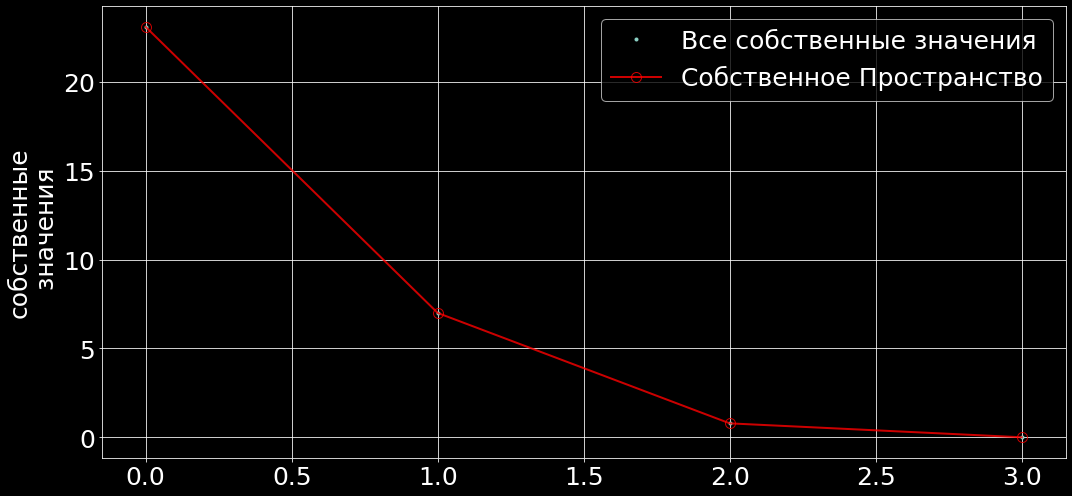

In [ ]:
pca.plot_eigvalues()

Связь главных компонент с исходными данными

Метод главных компонент связал наиболее изменчивые признаки корректно (т.е. `x4` - самый изменчивый, затем `х2`, затем `х3` и `х1`)

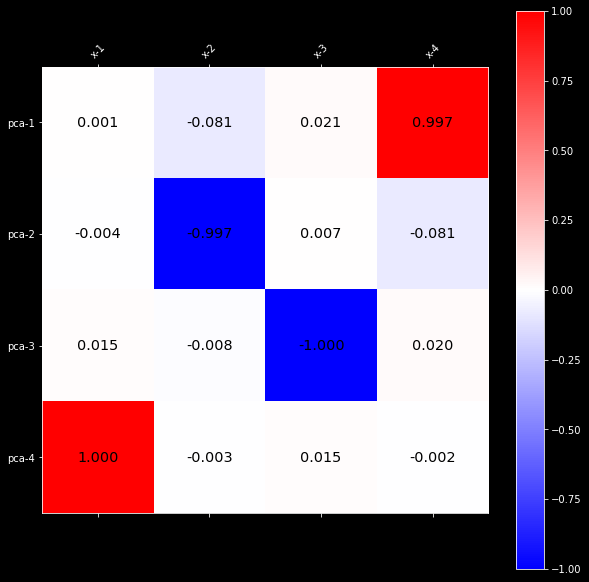

In [ ]:
fig=plt.figure(figsize=(10,10))
W = pca.components.T
x_names = ['x-'+str(x+1) for x in range(4)]
pca_names = ['pca-'+str(x+1) for x in range(4)]
plt.matshow(W.astype(float),cmap='bwr',vmin=-1,vmax=1, fignum=1)
for (i, j), z in np.ndenumerate(W):
    plt.text(j, i, '{:0.3f}'.format(z), ha='center', va='center', color = 'k', fontsize = 'x-large')
plt.xticks(np.arange(0, W.shape[1]), x_names,rotation = 45)
plt.yticks(np.arange(0, W.shape[0]),pca_names)
plt.colorbar();

Визуализируем пространство первых двух главных компонент

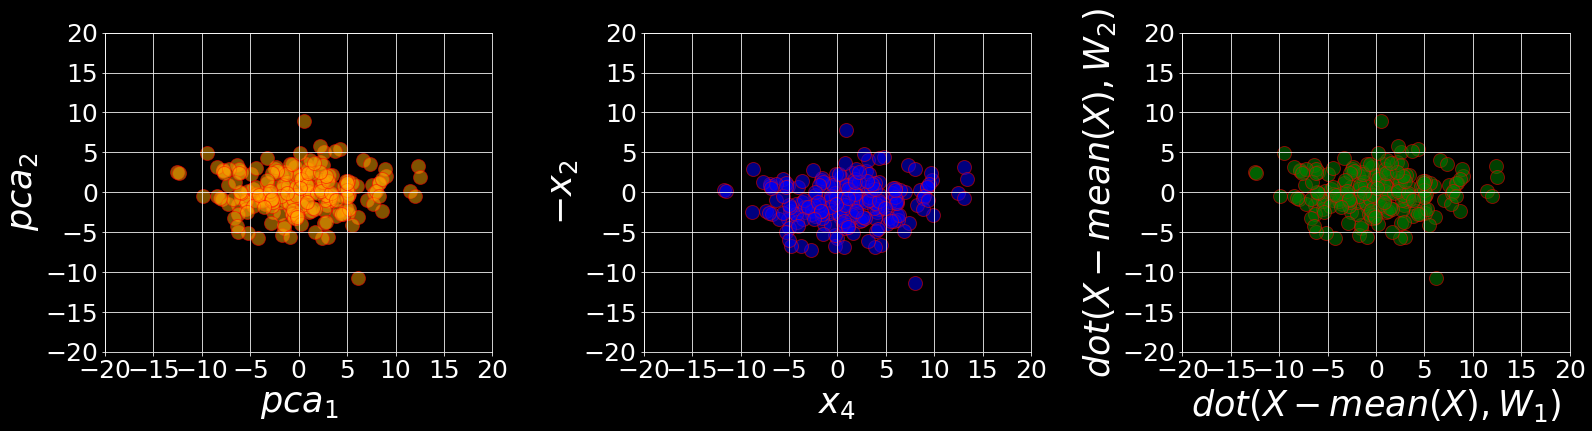

In [ ]:
X_new = pca.transform(X)

fig  = plt.figure(figsize=(22,6))
plt.subplot(131)
plt.scatter(X_new[:, 0],X_new[:, 1],
            alpha = 0.5, s = 196,
            c = 'orange', edgecolor = 'r');
plt.grid()
plt.xlabel(r"$pca_1$",fontsize=35)
plt.ylabel(r"$pca_2$",fontsize=35)
plt.xticks(FontSize = 25)
plt.yticks(FontSize = 25);
plt.tight_layout()
plt.xlim((-20,20))
plt.ylim((-20,20));
plt.subplot(132)
plt.scatter(X[:, 3],-X[:, 1],
            alpha = 0.5, s = 196,
            c = 'blue', edgecolor = 'r');
plt.grid()
plt.xlabel(r"$x_4$",fontsize=35)
plt.ylabel(r"$-x_2$",fontsize=35)
plt.xticks(FontSize = 25)
plt.yticks(FontSize = 25);
plt.tight_layout()
plt.xlim((-20,20))
plt.ylim((-20,20));
plt.subplot(133)
plt.scatter(W[0][0]*(X[:, 0]-pca.mean[0])+W[0][1]*(X[:, 1]-pca.mean[1]) + W[0][2]* (X[:, 2]-pca.mean[2])+W[0][3]*(X[:, 3]-pca.mean[3]),
           W[1][0]*(X[:, 0]-pca.mean[0])+W[1][1]*(X[:, 1]-pca.mean[1]) + W[1][2]* (X[:, 2]-pca.mean[2])+W[1][3]*(X[:, 3]-pca.mean[3]),
            alpha = 0.5, s = 196,
            c = 'green', edgecolor = 'r');
plt.grid()
plt.xlabel(r"$dot(X-mean(X),W_1)$",fontsize=35)
plt.ylabel(r"$dot(X-mean(X),W_2)$",fontsize=35)
plt.xticks(FontSize = 25)
plt.yticks(FontSize = 25);
plt.tight_layout()
plt.xlim((-20,20))
plt.ylim((-20,20));

получилось почти тоже самое, что и если бы мы визуализировали `x4` и `-х2` (см. коэффициенты в собственных векторах)

Небольшие отличия всё же есть, так как в

`PCA1 =0.001 * x'1 - 0.081 * x'2 + 0.021 * x'3 + 0.997 * x'4 `

а

`PCA2 =-0.004 * x'1 - 0.997 * x'2 + 0.007 * x'3 - 0.081 * x'4 `


Итого Метод Главных Компонент смог понять что из 4 признаков 2 более значимые

А значит можно использовать не все 4 исходных

А первые два признака из метода главных компонент без "потери качества"



In [ ]:
pd.DataFrame(X_new[:,[0,1]])

0         1
0    3.416156 -1.025692
1   -4.474281 -0.926497
2    3.814937 -3.010876
3    6.098580 -3.117301
4    2.207134  3.782362
..        ...       ...
195  5.003922  1.093402
196  0.162017  4.858900
197  2.856494 -3.673690
198  0.127754  0.529779
199 -0.145688 -3.104713

[200 rows x 2 columns]

## Мини-задание

Поменять слайдерами радиусы, убедиться что метод главных компонент выделяет именно признаки, которые изменяется наиболее значимо

# Ситуация 2.

У нас есть 4 признака, каждый из которых имеет разную "значимость"  в контексте дисперсии исходных данных. При этом 2 и 3 признак связаны

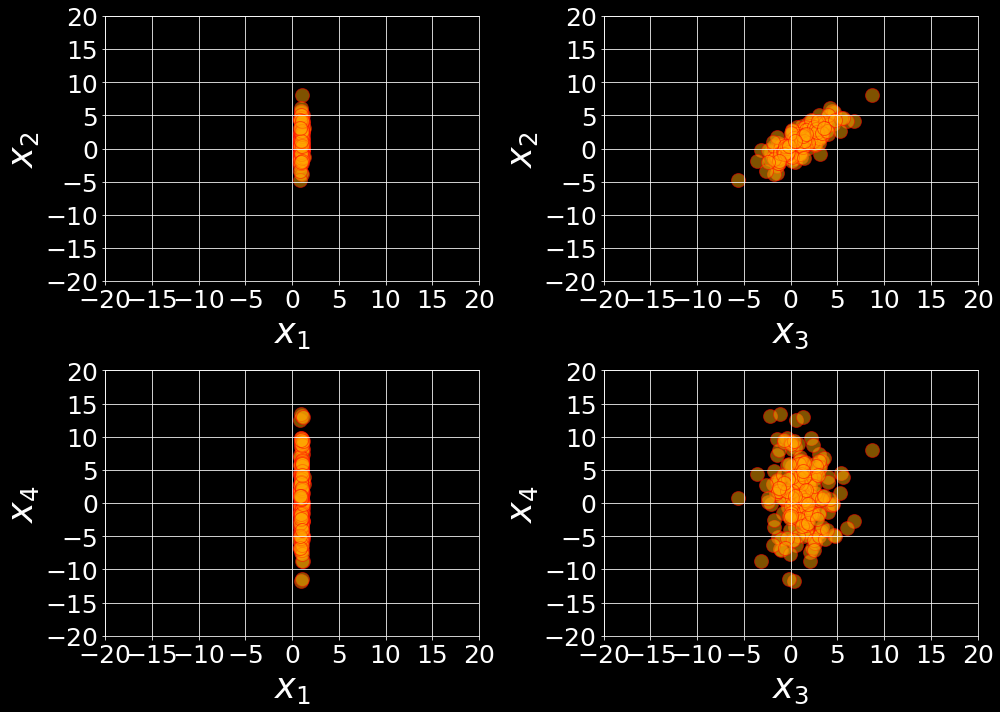

In [ ]:
#@title **Параметры распределения данных** { run: "auto" }
#@markdown ### Радиусы
S1 =  0.1 #@param {type:"slider", min:0, max:5, step:0.1}
S2 =  2.7 #@param {type:"slider", min:0, max:5, step:0.1}
S3 =  0.9 #@param {type:"slider", min:0, max:5, step:0.1}
S4 =  4.7 #@param {type:"slider", min:0, max:5, step:0.1}
#@markdown ### Количество точек
N = 200 #@param {type:"slider", min:100, max:2000, step:100}

np.random.seed(42)

theta = np.pi*45/180

# Матрица поворота
R = np.array([
    [1,0,0,0],
    [0,np.cos(theta), - np.sin(theta),0],
              [0,np.sin(theta), np.cos(theta),0],
              [0,0,0,1]])


Sigmas = np.array([S1, S2, S3, S4])



X = R@np.diag(Sigmas) @ np.random.randn(4, N)+np.ones((4, N))

fig = plt.figure(figsize=(14,10))

plt.subplot(221)
plt.grid()

plt.scatter(X[0,:],X[1,:],
            alpha = 0.5, s = 196,
            c = 'orange', edgecolor = 'r')
plt.xlabel(r'$x_1$',fontsize=35)
plt.ylabel(r'$x_2$',fontsize=35)
plt.xticks(FontSize = 25)
plt.yticks(FontSize = 25);
plt.xlim([-20,20])
plt.ylim([-20,20])

plt.subplot(222)
plt.grid()

plt.scatter(X[2,:],X[1,:],
            alpha = 0.5, s = 196,
            c = 'orange', edgecolor = 'r')
plt.xlabel(r'$x_3$',fontsize=35)
plt.ylabel(r'$x_2$',fontsize=35)
plt.xticks(FontSize = 25)
plt.yticks(FontSize = 25);
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.tight_layout();

plt.subplot(223)
plt.grid()

plt.scatter(X[0,:],X[3,:],
            alpha = 0.5, s = 196,
            c = 'orange', edgecolor = 'r')
plt.xlabel(r'$x_1$',fontsize=35)
plt.ylabel(r'$x_4$',fontsize=35)
plt.xticks(FontSize = 25)
plt.yticks(FontSize = 25);
plt.xlim([-20,20])
plt.ylim([-20,20])

plt.subplot(224)
plt.grid()

plt.scatter(X[2,:],X[3,:],
            alpha = 0.5, s = 196,
            c = 'orange', edgecolor = 'r')
plt.xlabel(r'$x_3$',fontsize=35)
plt.ylabel(r'$x_4$',fontsize=35)
plt.xticks(FontSize = 25)
plt.yticks(FontSize = 25);
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.tight_layout();

X = X.T;

In [ ]:
pd.DataFrame(X)

0         1         2         3
0    1.049671  2.697771  0.668396  4.557846
1    0.986174  2.452083  1.689203 -3.334177
2    1.064769  3.064412  3.071086  5.087148
3    1.152303  2.982008  3.041805  7.371498
4    0.976585 -1.343810 -1.916650  2.943144
..        ...       ...       ...       ...
195  1.038532  0.428828 -0.220317  5.949818
196  0.911614 -2.098949 -2.442444  0.814091
197  1.015373  4.207679  2.961916  4.203053
198  1.005821  1.064068  0.498575  1.133096
199  0.885703  3.123112  3.603337  1.139854

[200 rows x 4 columns]

## Применяем разработанный Класс PCA

Посмотрим на все компоненты

In [ ]:
pca = PCA(n_components = 4)
pca.fit(X)
pca.score(X)

1.0

Видим что есть 4 собственных значения

* очень большое (20+)
* умеренное (6+)
* небольшое (где-то <1)
* вообще не очень (в районе 0)

Т.е. метод главных компонент понял сам структуру признаков

При этом данные аналогичные предыдущим, поскольку единственное в чем отличие - 2 и 3 признаки, которые "повернуты"

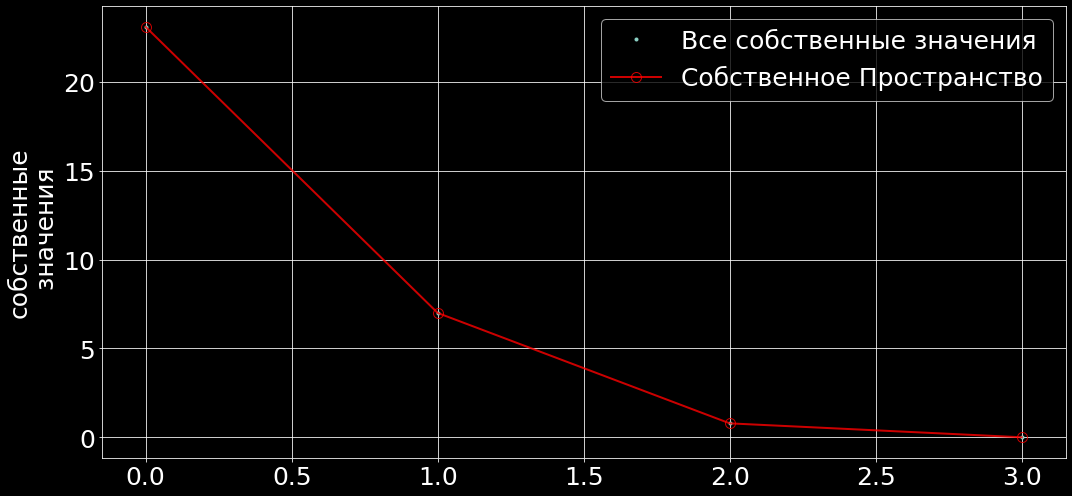

In [ ]:
pca.plot_eigvalues()

## Связь главных компонент с исходными данными

Метод главных компонент связал наиболее изменчивый признак `x4`

А также понял, что `х2`и `х3` связаны, а поэтому 2 и 3 главная компонета имеют в себе большой вклад этих признаков


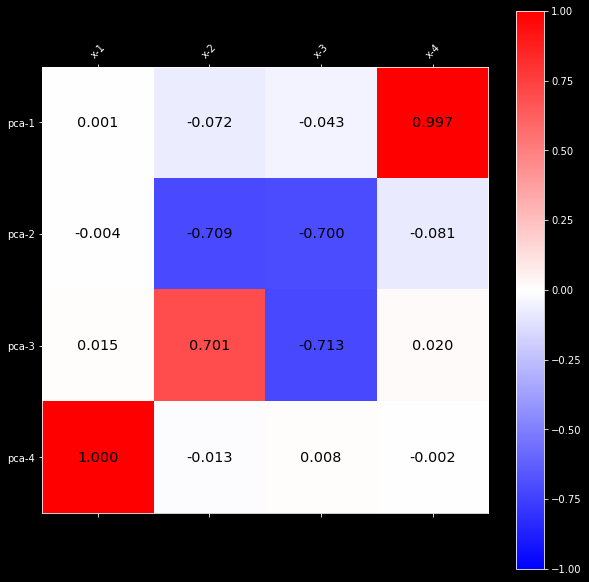

In [ ]:
fig=plt.figure(figsize=(10,10))
W = pca.components.T
x_names = ['x-'+str(x+1) for x in range(4)]
pca_names = ['pca-'+str(x+1) for x in range(4)]
plt.matshow(W.astype(float),cmap='bwr',vmin=-1,vmax=1, fignum=1)
for (i, j), z in np.ndenumerate(W):
    plt.text(j, i, '{:0.3f}'.format(z), ha='center', va='center', color = 'k', fontsize = 'x-large')
plt.xticks(np.arange(0, W.shape[1]), x_names,rotation = 45)
plt.yticks(np.arange(0, W.shape[0]),pca_names)
plt.colorbar();

Визуализируем пространство первых двух главных компонент

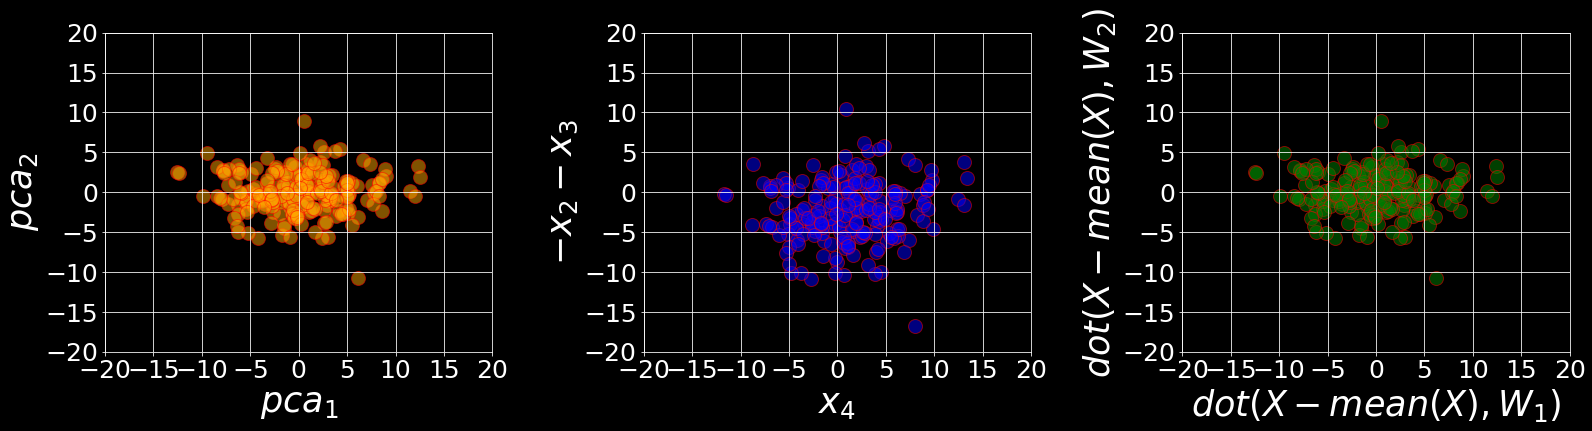

In [ ]:
X_new = pca.transform(X)

fig  = plt.figure(figsize=(22,6))
plt.subplot(131)
plt.scatter(X_new[:, 0],X_new[:, 1],
            alpha = 0.5, s = 196,
            c = 'orange', edgecolor = 'r');
plt.grid()
plt.xlabel(r"$pca_1$",fontsize=35)
plt.ylabel(r"$pca_2$",fontsize=35)
plt.xticks(FontSize = 25)
plt.yticks(FontSize = 25);
plt.tight_layout()
plt.xlim((-20,20))
plt.ylim((-20,20));
plt.subplot(132)
plt.scatter(X[:, 3],-X[:, 1]-X[:, 2],
            alpha = 0.5, s = 196,
            c = 'blue', edgecolor = 'r');
plt.grid()
plt.xlabel(r"$x_4$",fontsize=35)
plt.ylabel(r"$-x_2-x_3$",fontsize=35)
plt.xticks(FontSize = 25)
plt.yticks(FontSize = 25);
plt.tight_layout()
plt.xlim((-20,20))
plt.ylim((-20,20));
plt.subplot(133)
plt.scatter(W[0][0]*(X[:, 0]-pca.mean[0])+W[0][1]*(X[:, 1]-pca.mean[1]) + W[0][2]* (X[:, 2]-pca.mean[2])+W[0][3]*(X[:, 3]-pca.mean[3]),
           W[1][0]*(X[:, 0]-pca.mean[0])+W[1][1]*(X[:, 1]-pca.mean[1]) + W[1][2]* (X[:, 2]-pca.mean[2])+W[1][3]*(X[:, 3]-pca.mean[3]),
            alpha = 0.5, s = 196,
            c = 'green', edgecolor = 'r');
plt.grid()
plt.xlabel(r"$dot(X-mean(X),W_1)$",fontsize=35)
plt.ylabel(r"$dot(X-mean(X),W_2)$",fontsize=35)
plt.xticks(FontSize = 25)
plt.yticks(FontSize = 25);
plt.tight_layout()
plt.xlim((-20,20))
plt.ylim((-20,20));

получилось почти тоже самое, что и если бы мы визуализировали `x4` и `-х2-x3` (см. коэффициенты в собственных векторах)

Отличия более существенные, чем в прошлый раз т.к. теперь второй и третий признак входят во вторую главную компоненту с коэффициентом отличным от 1

`PCA1 =0.001 * x'1 - 0.072 * x'2 - 0.043 * x'3 + 0.997 * x'4 `

а

`PCA2 =-0.004 * x'1 - 0.709 * x'2 - 0.700 * x'3 - 0.081 * x'4 `


**Итого** Метод Главных Компонент смог понять что из 4 признаков **1 очень значимый**

А два признака связаны и менее значимы, и метод главных компонент понял как их объединить признак в 1 общий

Значит можно использовать не все 4 исходных признака

А первые два признака из метода главных компонент без "потери качества"



In [ ]:
pd.DataFrame(X_new[:,[0,1]])

0         1
0    3.416156 -1.025692
1   -4.474281 -0.926497
2    3.814937 -3.010876
3    6.098580 -3.117301
4    2.207134  3.782362
..        ...       ...
195  5.003922  1.093402
196  0.162017  4.858900
197  2.856494 -3.673690
198  0.127754  0.529779
199 -0.145688 -3.104713

[200 rows x 2 columns]

## Мини-задание

Поменять слайдерами радиусы, убедиться что метод главных компонент выделяет именно признаки, которые изменяется наиболее значимо